## Group Assigment 3 /May 2024
## Authored by: K Kodasso 200620319, Tyrone Chinnia 224233327 and Marcus Nkosi 219114630
## Date: 08 May 2024
## Source: yahoo finance
## url: https://github.com/Kodasso/Final-Group-newly

In [1]:
#install the packages for the first time use
!pip install requests
!pip install yfinance

In [2]:
#Importing all the libraries
import requests
import json
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
# ^GSPC: S&P 500 Index
# ^RUT: Russell 2000 Index
# ^HSI: Hang Seng Index
# ^N225: Nikkei 225 Index
# ^FTSE: FTSE 100 Index
# ^FCHI: CAC 40 Index
# 399001.SZ: Shenzhen Index

In [4]:
# List of symbols to fetch data for
symbols = ["^GSPC", "^RUT", "^HSI", "^N225", "^FTSE","^FCHI","399001.SZ"]

[*********************100%%**********************]  1 of 1 completed


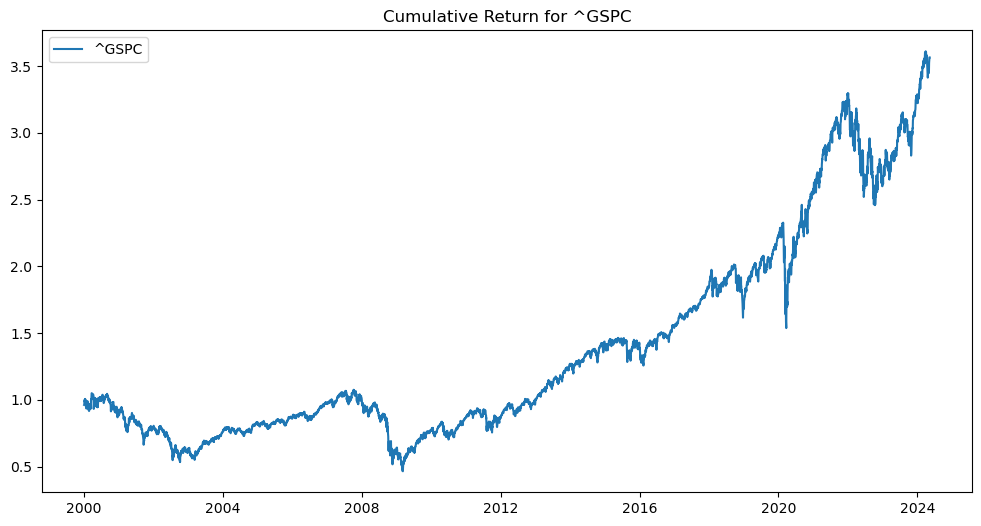

[*********************100%%**********************]  1 of 1 completed


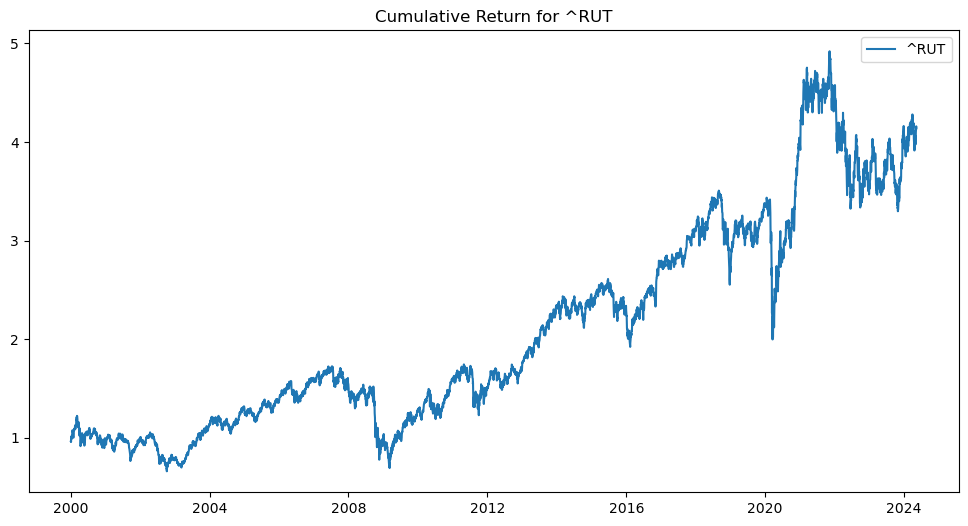

[*********************100%%**********************]  1 of 1 completed


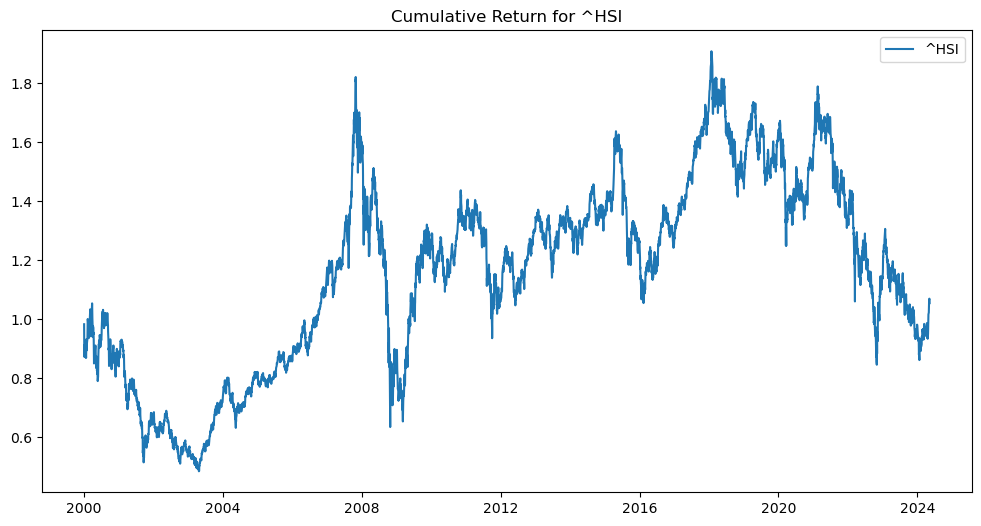

[*********************100%%**********************]  1 of 1 completed


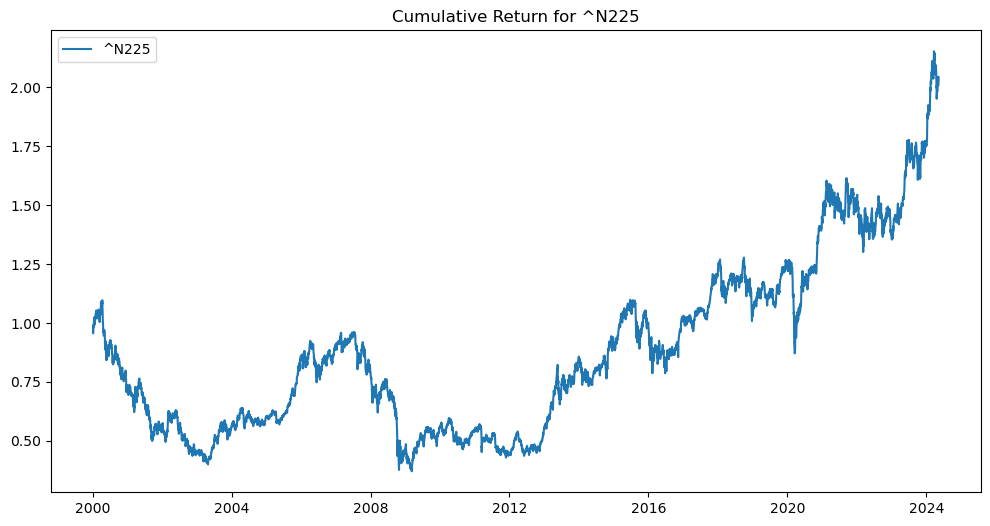

[*********************100%%**********************]  1 of 1 completed


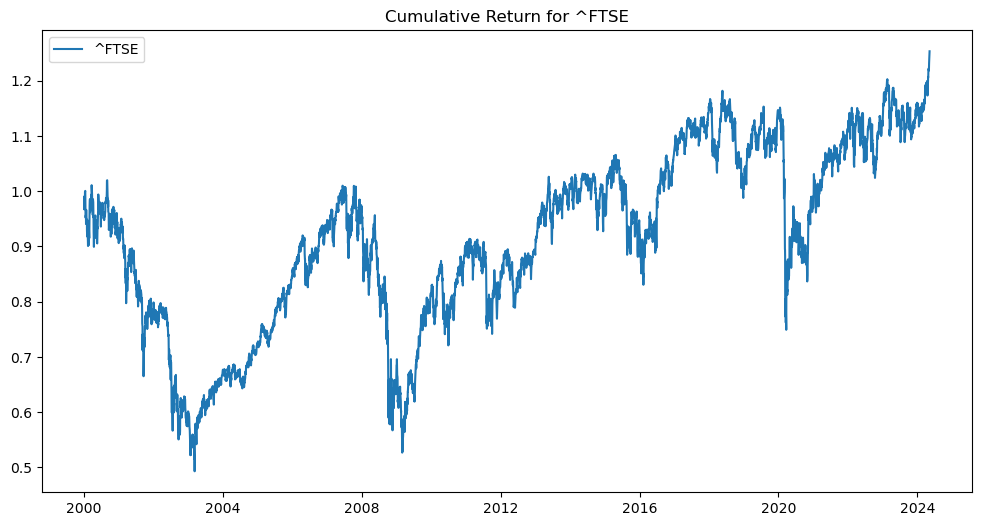

[*********************100%%**********************]  1 of 1 completed


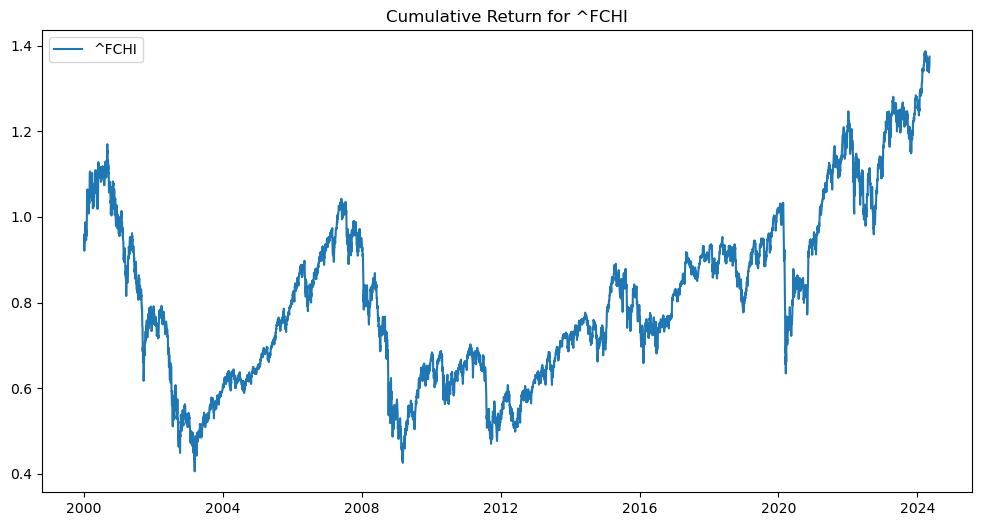

[*********************100%%**********************]  1 of 1 completed


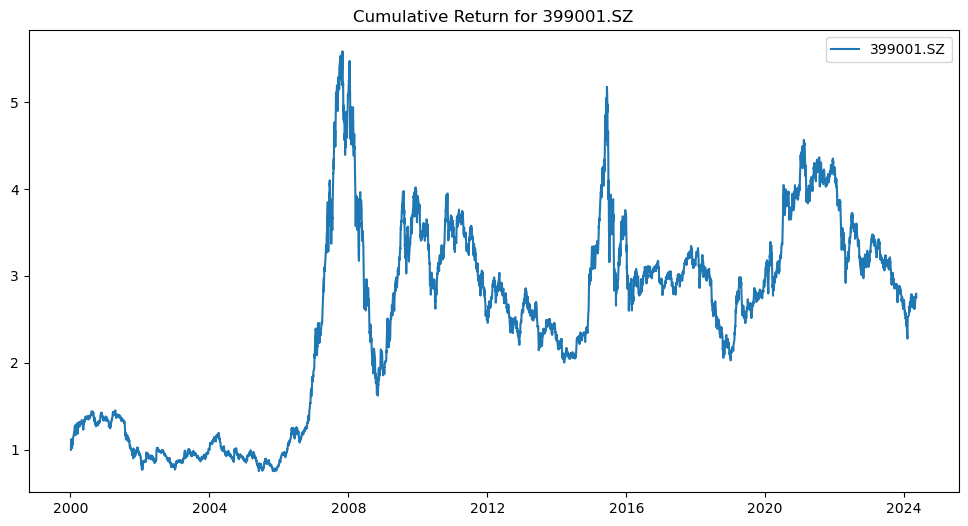

The 3 best investments based on the lowest mean squared error are:
1. ^FTSE from 2024-01-01 to 2024-12-31
2. ^GSPC from 2024-01-01 to 2024-12-31
3. ^FCHI from 2024-01-01 to 2024-12-31


In [5]:
# Data collection function
def get_data(symbol):
    data = yf.download(symbol, start='2000-01-01', end='2024-12-31')
    return data

# Data analysis function
def analyze_data(data):
    data['Return'] = data['Close'].pct_change()
    data['Cumulative Return'] = (1 + data['Return']).cumprod()
    return data

# Data visualization function
def visualize_data(data, symbol):
    plt.figure(figsize=(12,6))
    plt.plot(data['Cumulative Return'], label=symbol)
    plt.title('Cumulative Return for ' + symbol)
    plt.legend()
    plt.show()

# Investment recommendation function
def recommend_investment(data, symbol):
    data['Predicted Return'] = data['Return'].shift(-1)
    data.dropna(inplace=True)

    X = np.array(data['Return']).reshape(-1,1)
    y = np.array(data['Predicted Return'])

    X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=0)

    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    return metrics.mean_squared_error(y_test, y_pred)


# Main function
def main():
    mse_values = {}

    for symbol in symbols:
        data = get_data(symbol)
        # print(data.head())
        data = analyze_data(data)
        visualize_data(data, symbol)
        mse = recommend_investment(data, symbol)
        mse_values[symbol] = mse

    best_investments = sorted(mse_values, key=mse_values.get)[:3]
    print("The 3 best investments based on the lowest mean squared error are:")
    for i, symbol in enumerate(best_investments):
        print(f"{i+1}. {symbol} from 2024-01-01 to 2024-12-31")

# Run the main function
main()

In [6]:
data_ftse = yf.download('^FTSE', start='2000-01-01')
data_ftse.describe

[*********************100%%**********************]  1 of 1 completed


<bound method NDFrame.describe of                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-04  6930.200195  6930.200195  6662.899902  6665.899902  6665.899902   
2000-01-05  6665.899902  6665.899902  6500.399902  6535.899902  6535.899902   
2000-01-06  6535.899902  6547.299805  6424.399902  6447.200195  6447.200195   
2000-01-07  6447.200195  6532.399902  6438.799805  6504.799805  6504.799805   
2000-01-10  6504.799805  6634.200195  6504.799805  6607.700195  6607.700195   
...                 ...          ...          ...          ...          ...   
2024-05-01  8144.100098  8179.000000  8111.399902  8121.200195  8121.200195   
2024-05-02  8121.200195  8178.799805  8119.899902  8172.200195  8172.200195   
2024-05-03  8172.200195  8248.700195  8172.200195  8213.500000  8213.500000   
2024-05-07  8213.500000  8335.700195  8213.500000  8313.700195  8313.700195   
2024-05-08  8313.6

## Market Predictions

### Based on the previous analysis, we can conclude that the FTSE 100 is ranked first, followed by S&P 500 , and in third place is the CAC 40 Index"

We can consequently decide to allocate the R100,000 investment across the top three indices by spliting the money and invest it as follows R60 000 in FTSE, R20 000 in S&P 500, and R20 000 in CAC 40 Index

##### Investment number I : R60000 in FTSE

[*********************100%%**********************]  1 of 1 completed
C:\Users\tkodasso\AppData\Local\Temp\ipykernel_26852\948050009.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price_pounds = data['Adj Close'][-1]


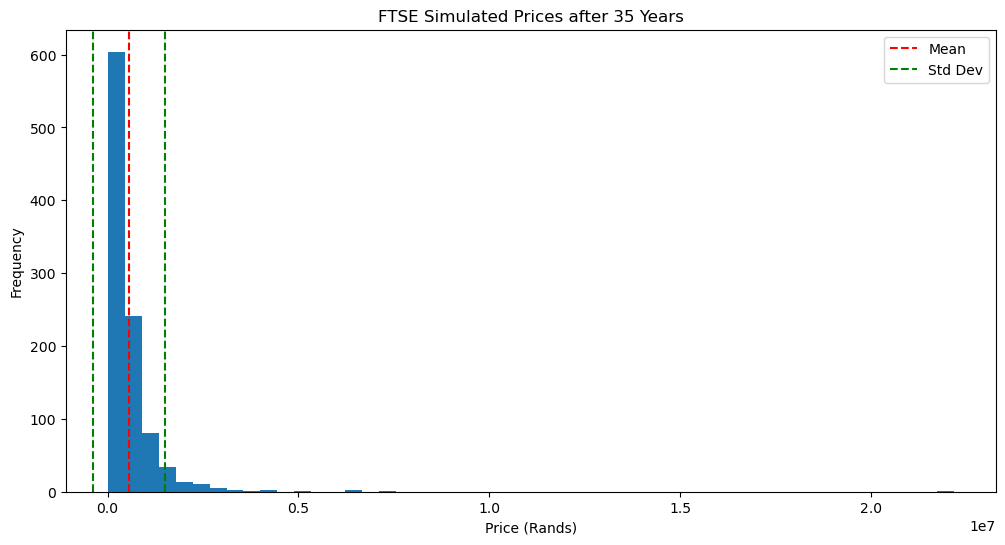

Investment amount: R60000
Investment period: 35 years
Current price: R193127.26
Mean simulated price: R564700.5
Standard deviation of simulated prices: R942774.58
Future price in 35 years: R13117992.62
Investment amount in 35 years: R586922.32


In [7]:
# Constants
TRADING_DAYS_PER_YEAR = 252
EXCHANGE_RATE = 23.23

# Get historical data for FTSE
symbol = "^FTSE"
data = yf.download(symbol, start='1980-01-01', end='2024-05-08')

# Current price in pounds
current_price_pounds = data['Adj Close'][-1]

# Convert current price to Rands
current_price_rands = current_price_pounds * EXCHANGE_RATE

# Calculate daily returns
returns = data['Adj Close'].pct_change()

# Mean and standard deviation of daily returns
mean_return = returns.mean()
volatility = returns.std()

# Annualized mean and standard deviation
mean_return_annual = mean_return * TRADING_DAYS_PER_YEAR
volatility_annual = volatility * np.sqrt(TRADING_DAYS_PER_YEAR)

# Simulate returns function
def simulate_returns(investment_amount, mean, std, investment_period, num_simulations):
    returns = np.random.normal(mean, std, (investment_period, num_simulations))
    prices = investment_amount * (1 + returns).cumprod(axis=0)
    return prices[-1]

# Simulation parameters
investment_amount_rands = 60000
investment_period = 35
num_simulations = 1000

# Run simulations
simulated_prices = simulate_returns(investment_amount_rands, mean_return_annual,
                                    volatility_annual, investment_period, num_simulations)

# Calculate statistics of simulated prices
mean_price_rands = np.mean(simulated_prices)
std_price_rands = np.std(simulated_prices)

# Future price in Rands
future_price_rands = mean_price_rands * EXCHANGE_RATE

# Investment amount in 35 years
investment_amount_35_years_rands = investment_amount_rands * (1 + mean_return_annual) ** investment_period

# Plot histogram of simulated prices
plt.figure(figsize=(12,6))
plt.hist(simulated_prices, bins=50)
plt.axvline(x=mean_price_rands, color='r', linestyle='--', label='Mean')
plt.axvline(x=mean_price_rands - std_price_rands, color='g', linestyle='--', label='Std Dev')
plt.axvline(x=mean_price_rands + std_price_rands, color='g', linestyle='--')
plt.title('FTSE Simulated Prices after {} Years'.format(investment_period))
plt.xlabel('Price (Rands)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print results
print('Investment amount: R{}'.format(investment_amount_rands))
print('Investment period: {} years'.format(investment_period))
print('Current price: R{}'.format(round(current_price_rands, 2)))
print('Mean simulated price: R{}'.format(round(mean_price_rands, 2)))
print('Standard deviation of simulated prices: R{}'.format(round(std_price_rands, 2)))
print('Future price in 35 years: R{}'.format(round(future_price_rands, 2)))
print('Investment amount in 35 years: R{}'.format(round(investment_amount_35_years_rands, 2)))

##### Investment number II : R20000 in S&F 500

[*********************100%%**********************]  1 of 1 completed
C:\Users\tkodasso\AppData\Local\Temp\ipykernel_26852\3966446048.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price_pounds = data['Adj Close'][-1]


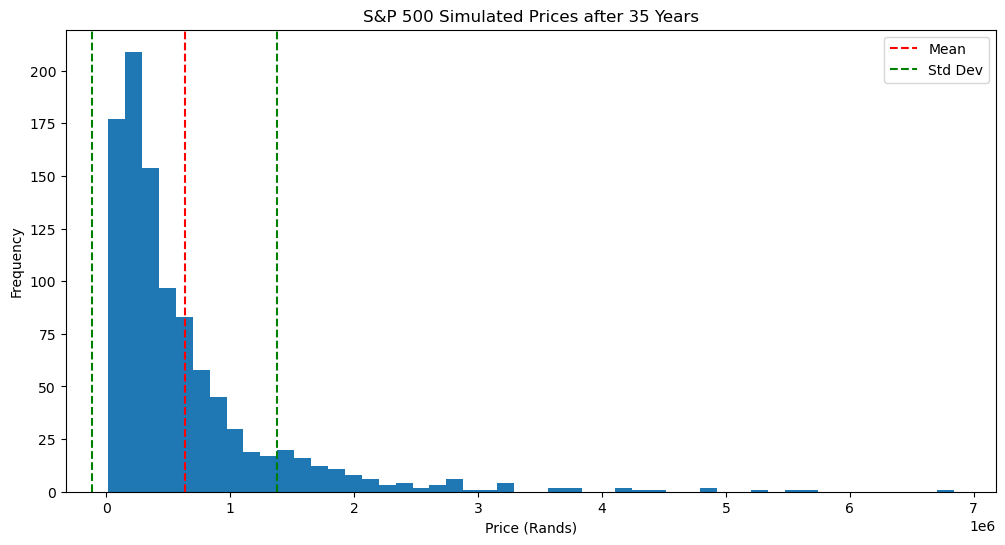

Investment amount: R20000
Investment period: 35 years
Current price: R120510.28
Mean simulated price: R630244.45
Standard deviation of simulated prices: R744106.02
Future price in 35 years: R14640578.53
Investment amount in 35 years: R635594.26


In [8]:
# Constants
TRADING_DAYS_PER_YEAR = 252
EXCHANGE_RATE = 23.23

# Get historical data for GSPC
symbol = "^GSPC"
data = yf.download(symbol, start='1980-01-01', end='2024-05-08')

# Current price in pounds
current_price_pounds = data['Adj Close'][-1]

# Convert current price to Rands
current_price_rands = current_price_pounds * EXCHANGE_RATE

# Calculate daily returns
returns = data['Adj Close'].pct_change()

# Mean and standard deviation of daily returns
mean_return = returns.mean()
volatility = returns.std()

# Annualized mean and standard deviation
mean_return_annual = mean_return * TRADING_DAYS_PER_YEAR
volatility_annual = volatility * np.sqrt(TRADING_DAYS_PER_YEAR)

# Simulate returns function
def simulate_returns(investment_amount, mean, std, investment_period, num_simulations):
    returns = np.random.normal(mean, std, (investment_period, num_simulations))
    prices = investment_amount * (1 + returns).cumprod(axis=0)
    return prices[-1]

# Simulation parameters
investment_amount_rands = 20000
investment_period = 35
num_simulations = 1000

# Run simulations
simulated_prices = simulate_returns(investment_amount_rands, mean_return_annual,
                                    volatility_annual, investment_period, num_simulations)

# Calculate statistics of simulated prices
mean_price_rands = np.mean(simulated_prices)
std_price_rands = np.std(simulated_prices)

# Future price in Rands
future_price_rands = mean_price_rands * EXCHANGE_RATE

# Investment amount in 35 years
investment_amount_35_years_rands = investment_amount_rands * (1 + mean_return_annual) ** investment_period

# Plot histogram of simulated prices
plt.figure(figsize=(12,6))
plt.hist(simulated_prices, bins=50)
plt.axvline(x=mean_price_rands, color='r', linestyle='--', label='Mean')
plt.axvline(x=mean_price_rands - std_price_rands, color='g', linestyle='--', label='Std Dev')
plt.axvline(x=mean_price_rands + std_price_rands, color='g', linestyle='--')
plt.title('S&P 500 Simulated Prices after {} Years'.format(investment_period))
plt.xlabel('Price (Rands)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print results
print('Investment amount: R{}'.format(investment_amount_rands))
print('Investment period: {} years'.format(investment_period))
print('Current price: R{}'.format(round(current_price_rands, 2)))
print('Mean simulated price: R{}'.format(round(mean_price_rands, 2)))
print('Standard deviation of simulated prices: R{}'.format(round(std_price_rands, 2)))
print('Future price in 35 years: R{}'.format(round(future_price_rands, 2)))
print('Investment amount in 35 years: R{}'.format(round(investment_amount_35_years_rands, 2)))

##### Investment number III : R20000 in FCHI index

[*********************100%%**********************]  1 of 1 completed
C:\Users\tkodasso\AppData\Local\Temp\ipykernel_26852\959431761.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price_pounds = data['Adj Close'][-1]


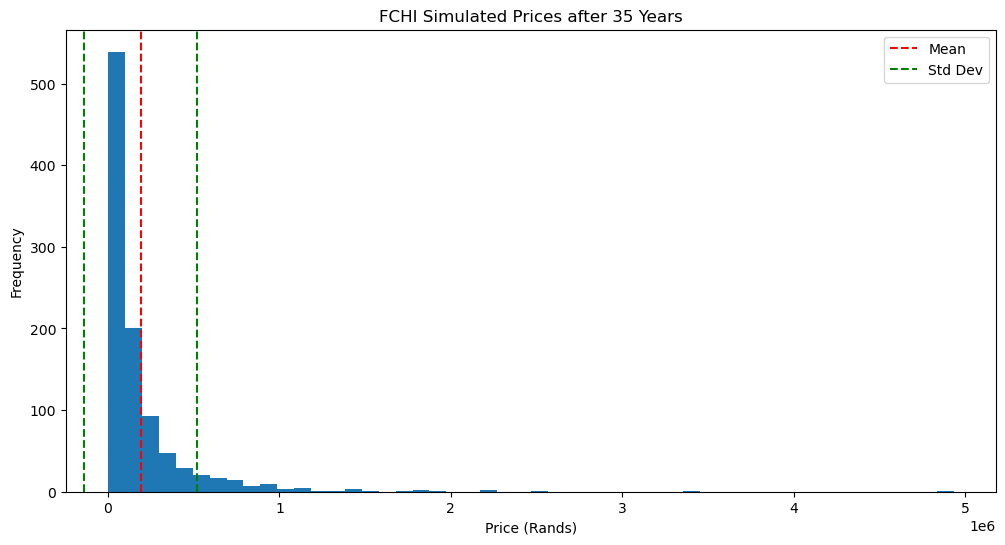

Investment amount: R20000
Investment period: 35 years
Current price: R187598.05
Mean simulated price: R189469.56
Standard deviation of simulated prices: R327160.65
Future price in 35 years: R4401377.91
Investment amount in 35 years: R187859.88


In [9]:
# Constants
TRADING_DAYS_PER_YEAR = 252
EXCHANGE_RATE = 23.23

# Get historical data for FCHI
symbol = "^FCHI"
data = yf.download(symbol, start='1980-01-01', end='2024-05-08')

# Current price in pounds
current_price_pounds = data['Adj Close'][-1]

# Convert current price to Rands
current_price_rands = current_price_pounds * EXCHANGE_RATE

# Calculate daily returns
returns = data['Adj Close'].pct_change()

# Mean and standard deviation of daily returns
mean_return = returns.mean()
volatility = returns.std()

# Annualized mean and standard deviation
mean_return_annual = mean_return * TRADING_DAYS_PER_YEAR
volatility_annual = volatility * np.sqrt(TRADING_DAYS_PER_YEAR)

# Simulate returns function
def simulate_returns(investment_amount, mean, std, investment_period, num_simulations):
    returns = np.random.normal(mean, std, (investment_period, num_simulations))
    prices = investment_amount * (1 + returns).cumprod(axis=0)
    return prices[-1]

# Simulation parameters
investment_amount_rands = 20000
investment_period = 35
num_simulations = 1000

# Run simulations
simulated_prices = simulate_returns(investment_amount_rands, mean_return_annual,
                                    volatility_annual, investment_period, num_simulations)

# Calculate statistics of simulated prices
mean_price_rands = np.mean(simulated_prices)
std_price_rands = np.std(simulated_prices)

# Future price in Rands
future_price_rands = mean_price_rands * EXCHANGE_RATE

# Investment amount in 35 years
investment_amount_35_years_rands = investment_amount_rands * (1 + mean_return_annual) ** investment_period

# Plot histogram of simulated prices
plt.figure(figsize=(12,6))
plt.hist(simulated_prices, bins=50)
plt.axvline(x=mean_price_rands, color='r', linestyle='--', label='Mean')
plt.axvline(x=mean_price_rands - std_price_rands, color='g', linestyle='--', label='Std Dev')
plt.axvline(x=mean_price_rands + std_price_rands, color='g', linestyle='--')
plt.title('FCHI Simulated Prices after {} Years'.format(investment_period))
plt.xlabel('Price (Rands)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print results
print('Investment amount: R{}'.format(investment_amount_rands))
print('Investment period: {} years'.format(investment_period))
print('Current price: R{}'.format(round(current_price_rands, 2)))
print('Mean simulated price: R{}'.format(round(mean_price_rands, 2)))
print('Standard deviation of simulated prices: R{}'.format(round(std_price_rands, 2)))
print('Future price in 35 years: R{}'.format(round(future_price_rands, 2)))
print('Investment amount in 35 years: R{}'.format(round(investment_amount_35_years_rands, 2)))

## Regression analysis on FTSE

[*********************100%%**********************]  1 of 1 completed


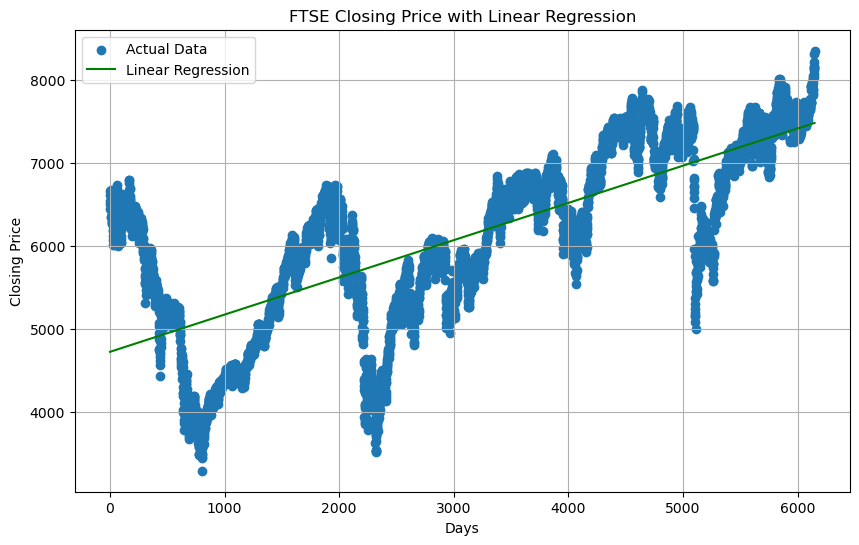

In [10]:
# Download FTSE data
data_ftse = yf.download('^FTSE', start='2000-01-01')

# Extracting features and target
X = np.arange(len(data_ftse)).reshape(-1, 1)
y = data_ftse['Close']

# Initialize and fit linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X, y)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data')
plt.plot(X, linear_reg.predict(X), color='green', label='Linear Regression')
plt.title('FTSE Closing Price with Linear Regression')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()